In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


<Figure size 1500x800 with 0 Axes>

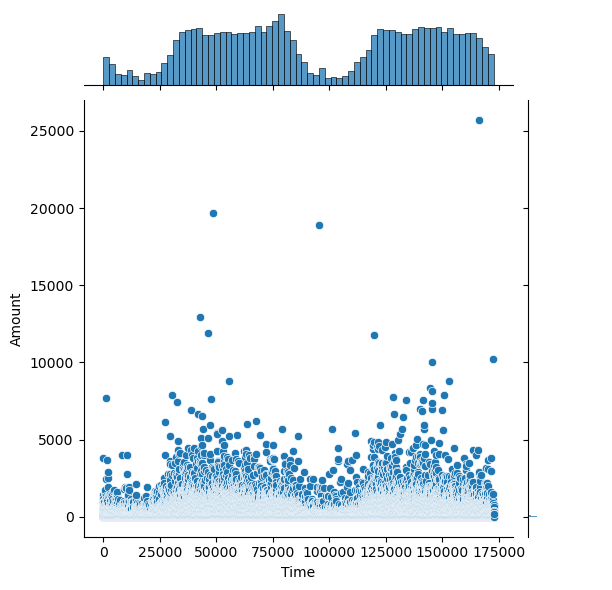

In [4]:
plt.figure(figsize=(15,8))
sns.jointplot(x='Time',y='Amount',data=df)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.shape

(284807, 31)

In [7]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [8]:
legit = df[df['Class']==0]
farud = df[df['Class']==1]

In [9]:
# legit.shape
farud.shape

(492, 31)

In [10]:
legit_sample = legit.sample(n=492)
df = pd.concat([legit_sample,farud],axis=0)

In [11]:
df['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [12]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93132.331301,0.056226,0.035765,0.066184,-0.026838,-0.009855,0.018530,0.069752,0.017538,-0.108143,...,0.014913,-0.024543,0.012598,-0.030493,-0.011944,-0.000574,-0.006046,0.015887,0.008491,93.867785
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [13]:
X = df.drop('Class',axis=1)
y = df['Class']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=2)

In [15]:
lg = LogisticRegression() 

In [16]:
lg.fit(X_train,y_train)

LogisticRegression()

In [17]:
pred = lg.predict(X_test)

In [18]:
from sklearn.metrics import classification_report

In [19]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        99
           1       0.94      0.90      0.92        98

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197



In [20]:
print(accuracy_score(y_test,pred))

0.9187817258883249


In [21]:
import string

In [26]:
input_df = 69,-2.22064182690618,1.02918071808636,-0.697723601958822,-1.26822646644294,2.80222102796582,3.32290136384897,0.197036005343823,-0.521296961184743,0.859596358876793,1.5939492660972,0.311202771235588,-0.433713474113116,-0.0873153342987856,-1.10816364415856,1.30866894993326,0.521481126221399,-0.735664502667711,0.165409024425517,0.31451549056561,-0.111529833982581,0.110447912674207,-1.17846330322093,0.508910502200337,0.923385244847386,0.213758667336886,0.033506667714588,-0.142024761178452,-0.263844092949627,9.47

features = np.array(input_df, dtype=np.float64)
    # make prediction
prediction = lg.predict(features.reshape(1,-1))
    # display result
if prediction[0] == 0:
    print("Legitimate transaction")
else:
    print("Fraudulent transaction")

Legitimate transaction
